# Importing Libraries

In [1]:
# Standard Libraries
import math
import itertools
from collections import Counter, defaultdict
from itertools import combinations

# Data Handling
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm 
from matplotlib.colors import from_levels_and_colors
from IPython.display import display
%matplotlib inline

# Statistical Libraries
import scipy.stats as stats

# Machine Learning Libraries
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score

# Other Third-Party Libraries
import gower
import prince
from prince import FAMD
from kmodes.kprototypes import KPrototypes
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Turn Off Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set the option to display all rows
pd.set_option('display.max_rows', None)

# Set the option to display all columns
pd.set_option('display.max_columns', None)

# Set the width of each column to ensure the content isn't truncated
pd.set_option('display.max_colwidth', None)

# Turn off scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
# Load cleaned dataset
churn_df = pd.read_csv('/Users/williamjowens/Desktop/Datasets/clean_df.csv')
churn_df.head()

,call_failures,complaint,months_subscribed,charge_amt,total_call_secs,total_calls,total_texts,distinct_calls,age_group,tariff_plan,active_status,customer_value,churn
0,8,0,38,0,4370,71,5,17,3,0,1,197.640,0
1,0,0,39,0,318,5,7,4,2,0,0,46.035,0
2,10,0,37,0,2453,60,359,24,3,0,1,1536.520,0
3,10,0,38,0,4198,66,1,35,1,0,1,240.020,0
4,3,0,38,0,2393,58,2,33,1,0,1,145.805,0


# Cluster Analysis

## K-Prototypes with Cao Method

In [4]:
# Load cleaned dataset
churn_df = pd.read_csv('/Users/williamjowens/Desktop/Datasets/clean_df.csv')
churn_df.head()

,call_failures,complaint,months_subscribed,charge_amt,total_call_secs,total_calls,total_texts,distinct_calls,age_group,tariff_plan,active_status,customer_value,churn
0,8,0,38,0,4370,71,5,17,3,0,1,197.640,0
1,0,0,39,0,318,5,7,4,2,0,0,46.035,0
2,10,0,37,0,2453,60,359,24,3,0,1,1536.520,0
3,10,0,38,0,4198,66,1,35,1,0,1,240.020,0
4,3,0,38,0,2393,58,2,33,1,0,1,145.805,0


In [5]:
def perform_kprototypes_clustering(data, n_clusters, categorical_columns=None, init_method='Cao', verbose=False, save_path=None):
    """
    Perform k-prototypes clustering on the provided data.

    Parameters:
    data (pd.DataFrame): The data on which to perform clustering.
    n_clusters (int): The number of clusters to form.
    categorical_columns (list of str): The names of categorical columns in the data.
    init_method (str): Method for initialization. Default is 'Cao'.
    verbose (bool): Verbosity of clustering process. Default is False.
    save_path (str): Path to save the resulting clustered data. If None, data will not be saved.

    Returns:
    pd.DataFrame: The original data with an additional column for the cluster labels.
    """

    # If no categorical columns provided, try to infer them
    if categorical_columns is None:
        categorical_columns = [col for col in data.columns if data[col].dtype == 'object']

    # Convert column names to indices
    categorical_indices = [data.columns.get_loc(col) for col in categorical_columns]

    # Perform k-prototypes clustering
    kproto = KPrototypes(n_clusters=n_clusters, init=init_method, verbose=verbose)
    clusters = kproto.fit_predict(data, categorical=categorical_indices)

    # Add the cluster labels to the DataFrame
    data['cluster_label'] = clusters  # change is made on this line

    # Save the results if save_path is provided
    if save_path:
        data.to_csv(save_path, index=False)

    # Print the cluster centroids
    print(kproto.cluster_centroids_)

    # Print details of each cluster
    for c in set(clusters):
        print(f"Cluster {c}:")
        print(data[data['cluster_label'] == c].describe(include='all'))

    return data

In [6]:
# Number of clusters
n_clusters = 3

# Specify categorical columns by name
categorical_columns = ['complaint', 'tariff_plan', 'active_status', 'churn']

# Path to save clustered data
save_path = 'clustered_data.csv'

# Perform clustering
clustered_data = perform_kprototypes_clustering(churn_df, n_clusters, categorical_columns=categorical_columns, save_path=save_path)

# Print the first few rows
clustered_data.head()

[[9.15965347e+00 3.20990099e+01 1.45792079e+00 6.70670545e+03
  1.04133663e+02 1.14304455e+02 3.09517327e+01 2.83292079e+00
  7.24790427e+02 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00]
 [5.57989950e+00 3.20527638e+01 4.82412060e-01 1.88001307e+03
  3.51969849e+01 6.19643216e+01 1.64386935e+01 2.80552764e+00
  3.22351437e+02 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00]
 [1.56903409e+01 3.63238636e+01 2.36363636e+00 1.40000114e+04
  1.83576705e+02 4.21420455e+01 4.64034091e+01 2.92613636e+00
  7.28564375e+02 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00]]
Cluster 0:
       call_failures  complaint  months_subscribed  charge_amt  \
count        808.000    808.000            808.000     808.000   
mean           9.160      0.025             32.099       1.458   
std            6.170      0.155              9.724       1.561   
min            0.000      0.000              4.000       0.000   
25%            4.000      0.000             30

,call_failures,complaint,months_subscribed,charge_amt,total_call_secs,total_calls,total_texts,distinct_calls,age_group,tariff_plan,active_status,customer_value,churn,cluster_label
0,8,0,38,0,4370,71,5,17,3,0,1,197.640,0,0
1,0,0,39,0,318,5,7,4,2,0,0,46.035,0,1
2,10,0,37,0,2453,60,359,24,3,0,1,1536.520,0,1
3,10,0,38,0,4198,66,1,35,1,0,1,240.020,0,1
4,3,0,38,0,2393,58,2,33,1,0,1,145.805,0,1


In [7]:
def plot_clusters(data, x, y, cluster_label_col):
    """
    Plots the clusters in a 2D space.
    
    :param data: DataFrame containing the data with cluster labels
    :param x: String, name of the column for the x-axis
    :param y: String, name of the column for the y-axis
    :param cluster_label_col: String, name of the column with cluster labels
    """
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(data[x], data[y], c=data[cluster_label_col], cmap='viridis')
    plt.colorbar(scatter)

    plt.title('Cluster Representation')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

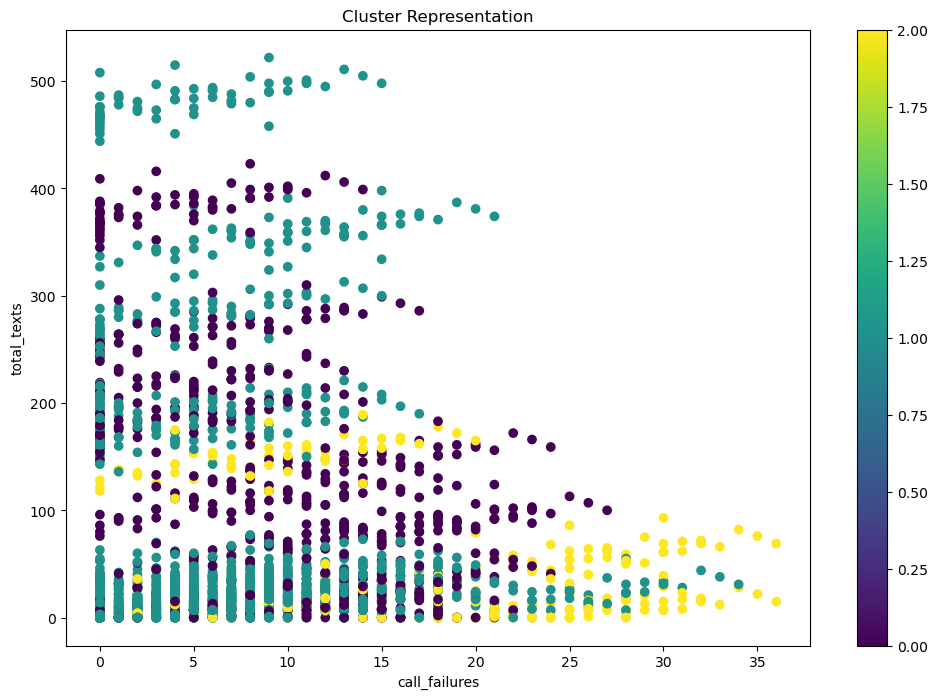

In [8]:
# Plot the clusters
plot_clusters(clustered_data, 'call_failures', 'total_texts', 'cluster_label')

In [9]:
def analyze_clusters(clustered_data, cluster_label_col):
    """
    Analyzes clusters by grouping data and using the summarize function.
    
    :param clustered_data: DataFrame containing data with cluster labels
    :param cluster_label_col: String, name of the column with cluster labels
    :return: A dictionary containing summaries for each cluster
    """
    cluster_summaries = {}
    for cluster in set(clustered_data[cluster_label_col]):
        cluster_data = clustered_data[clustered_data[cluster_label_col] == cluster]
        cluster_summary = summarize(cluster_data)
        cluster_summaries[cluster] = cluster_summary
    return cluster_summaries

In [10]:
def summarize(df):
    summary = df.describe()
    return summary

cluster_analysis = analyze_clusters(clustered_data, 'cluster_label')
for cluster, summary in cluster_analysis.items():
    print(f"\nCluster {cluster} summary:")
    display(summary)


Cluster 0 summary:


,call_failures,complaint,months_subscribed,charge_amt,total_call_secs,total_calls,total_texts,distinct_calls,age_group,tariff_plan,active_status,customer_value,churn,cluster_label
count,808.000,808.000,808.000,808.000,808.000,808.000,808.000,808.000,808.000,808.000,808.000,808.000,808.000,808.000
mean,9.160,0.025,32.099,1.458,6706.705,104.134,114.304,30.952,2.833,0.167,1.000,724.790,0.047,0.000
std,6.170,0.155,9.724,1.561,1521.824,30.979,113.904,11.719,1.002,0.373,0.000,531.587,0.212,0.000
min,0.000,0.000,4.000,0.000,4265.000,34.000,0.000,4.000,1.000,0.000,1.000,97.080,0.000,0.000
25%,4.000,0.000,30.000,0.000,5703.000,83.000,17.000,22.000,2.000,0.000,1.000,270.319,0.000,0.000
50%,9.000,0.000,35.000,1.000,6580.000,98.000,82.000,32.000,3.000,0.000,1.000,648.200,0.000,0.000
75%,14.000,0.000,39.000,2.000,7428.000,124.000,183.000,40.000,3.000,0.000,1.000,1007.680,0.000,0.000
max,27.000,1.000,46.000,8.000,10320.000,188.000,423.000,60.000,5.000,1.000,1.000,2148.030,1.000,0.000



Cluster 1 summary:


,call_failures,complaint,months_subscribed,charge_amt,total_call_secs,total_calls,total_texts,distinct_calls,age_group,tariff_plan,active_status,customer_value,churn,cluster_label
count,1990.000,1990.000,1990.000,1990.000,1990.000,1990.000,1990.000,1990.000,1990.000,1990.000,1990.000,1990.000,1990.000,1990.000
mean,5.580,0.103,32.053,0.482,1880.013,35.197,61.964,16.439,2.806,0.037,0.607,322.351,0.230,1.000
std,5.865,0.304,8.488,0.894,1209.168,23.066,114.794,13.834,0.840,0.188,0.489,474.367,0.421,0.000
min,0.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000
25%,0.000,0.000,28.000,0.000,885.750,16.000,2.000,6.000,2.000,0.000,0.000,71.269,0.000,1.000
50%,5.000,0.000,35.000,0.000,1846.500,34.000,16.000,14.000,3.000,0.000,1.000,146.760,0.000,1.000
75%,9.000,0.000,38.000,1.000,2809.500,52.000,39.000,23.000,3.000,0.000,1.000,244.435,0.000,1.000
max,34.000,1.000,47.000,6.000,4313.000,98.000,522.000,85.000,5.000,1.000,1.000,2165.280,1.000,1.000



Cluster 2 summary:


,call_failures,complaint,months_subscribed,charge_amt,total_call_secs,total_calls,total_texts,distinct_calls,age_group,tariff_plan,active_status,customer_value,churn,cluster_label
count,352.000,352.000,352.000,352.000,352.000,352.000,352.000,352.000,352.000,352.000,352.000,352.000,352.000,352.000
mean,15.690,0.045,36.324,2.364,14000.011,183.577,42.142,46.403,2.926,0.105,1.000,728.564,0.000,2.000
std,9.825,0.209,4.199,2.606,1965.291,43.221,54.230,17.963,0.909,0.307,0.000,364.983,0.000,0.000
min,0.000,0.000,23.000,0.000,10355.000,87.000,0.000,13.000,2.000,0.000,1.000,159.420,0.000,2.000
25%,7.000,0.000,34.000,0.000,11770.000,159.000,2.750,33.000,2.000,0.000,1.000,468.320,0.000,2.000
50%,15.000,0.000,37.000,2.000,14781.500,178.000,16.000,43.000,3.000,0.000,1.000,718.538,0.000,2.000
75%,24.000,0.000,39.000,3.000,15600.000,225.000,57.250,50.000,3.000,0.000,1.000,863.029,0.000,2.000
max,36.000,1.000,46.000,10.000,17090.000,255.000,189.000,97.000,5.000,1.000,1.000,1547.460,0.000,2.000


In [11]:
def elbow_method_kprototypes(data, categorical_columns=None, max_clusters=10, init_method='Cao', verbose=False):
    """
    Apply the elbow method for k-prototypes to determine the optimal number of clusters.

    Parameters:
    - data (DataFrame): The dataset to find optimal clusters for.
    - categorical_columns (list of str): The names of categorical columns in the data.
    - max_clusters (int): The maximum number of clusters to test.
    - init_method (str): Method for initialization. Default is 'Cao'.
    - verbose (bool): Verbosity of clustering process. Default is False.

    Returns:
    - Plots the cost against the number of clusters.
    """
    if categorical_columns is None:
        categorical_columns = [col for col in data.columns if data[col].dtype == 'object']

    # Convert column names to indices
    categorical_indices = [data.columns.get_loc(col) for col in categorical_columns]

    costs = []
    for k in range(1, max_clusters + 1):
        kproto = KPrototypes(n_clusters=k, init=init_method, verbose=verbose)
        kproto.fit_predict(data, categorical=categorical_indices)
        costs.append(kproto.cost_)

        if verbose:
            print(f'Cost for {k} clusters: {kproto.cost_}')

    plt.figure(figsize=(12, 6))
    plt.plot(range(1, max_clusters + 1), costs, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Cost')
    plt.title('Elbow Method For Optimal k with k-prototypes')
    plt.grid(False)
    plt.show()

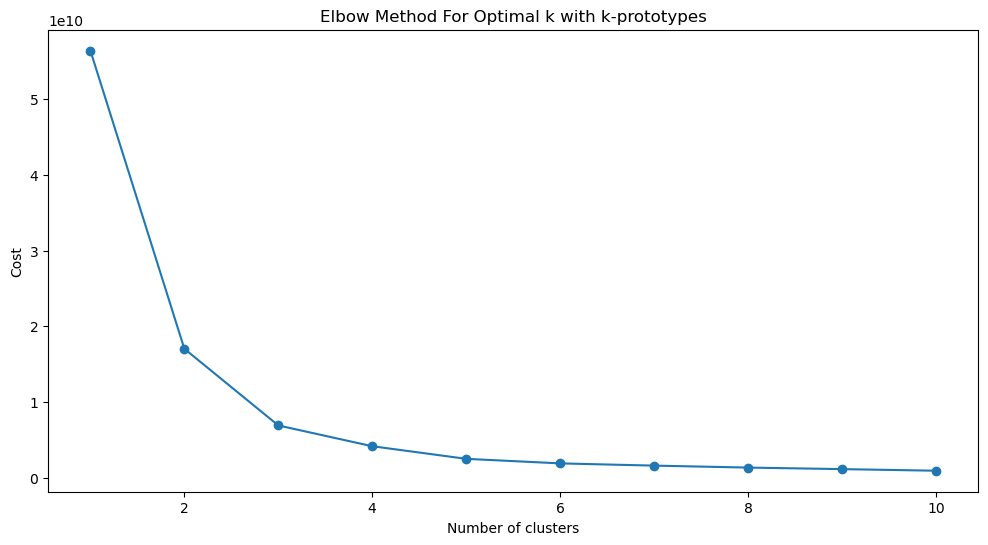

In [12]:
# Specify categorical columns by name
categorical_columns = ['complaint', 'tariff_plan', 'active_status', 'churn']

# Perform the elbow method
elbow_method_kprototypes(churn_df, categorical_columns=categorical_columns, max_clusters=10, verbose=False)

In [13]:
def silhouette_analysis_kprototypes(data, categorical_columns=None, max_clusters=10, init_method='Cao', verbose=False):
    """
    Perform silhouette analysis for k-prototypes, considering only the numerical data for the silhouette score.

    Parameters:
    - data (DataFrame): The dataset to perform silhouette analysis on.
    - categorical_columns (list of str): The names of categorical columns in the data.
    - max_clusters (int): The maximum number of clusters to test.
    - init_method (str): Method for initialization. Default is 'Cao'.
    - verbose (bool): Verbosity of clustering process. Default is False.

    Returns:
    - Plots silhouette scores for different numbers of clusters.
    """
    if categorical_columns is None:
        categorical_columns = [col for col in data.columns if data[col].dtype == 'object']

    # Convert column names to indices
    categorical_indices = [data.columns.get_loc(col) for col in categorical_columns]

    # Extract only numerical attributes for silhouette score calculation
    numerical_data = data.drop(columns=categorical_columns)

    silhouette_scores = []
    for k in range(2, max_clusters + 1):  # silhouette score is not well-defined for a single cluster
        kproto = KPrototypes(n_clusters=k, init=init_method, verbose=verbose)
        clusters = kproto.fit_predict(data, categorical=categorical_indices)
        silhouette_avg = silhouette_score(numerical_data, clusters)
        silhouette_scores.append(silhouette_avg)

        if verbose:
            print(f'Silhouette score for {k} clusters: {silhouette_avg}')

    plt.figure(figsize=(12, 6))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Analysis For Optimal k with k-prototypes')
    plt.grid(False)
    plt.show()

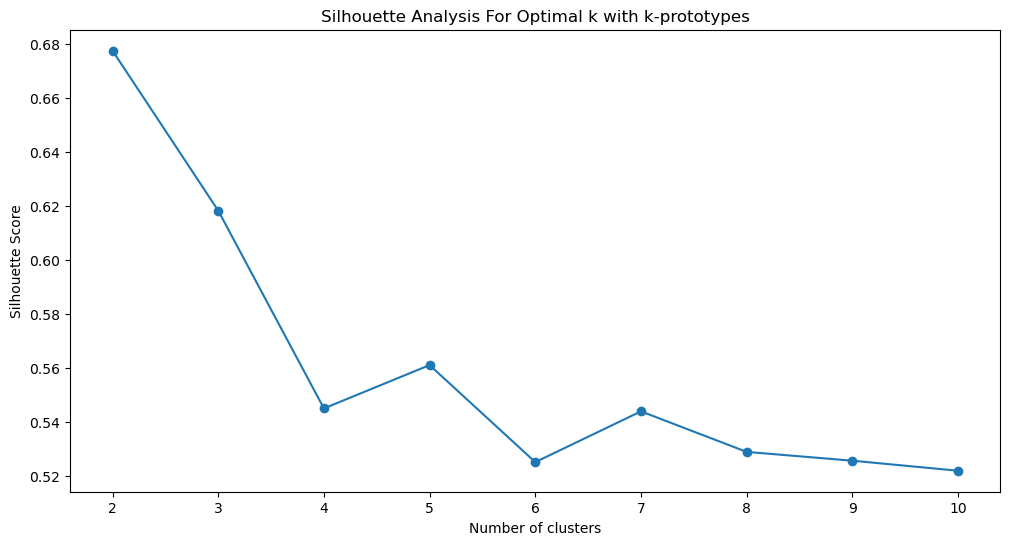

In [14]:
# Specify the column names of categorical attributes
categorical_columns = ['complaint', 'tariff_plan', 'active_status', 'churn']

# Perform silhouette analysis
silhouette_analysis_kprototypes(churn_df, categorical_columns=categorical_columns, max_clusters=10, verbose=False)

In [15]:
def calculate_gamma(X, categorical):
    Xnum = X[:, [i for i in range(X.shape[1]) if i not in categorical]]
    return 0.5 * np.mean(Xnum.std(axis=0))

def euclidean_dissim(a, b):
    return np.sqrt(np.sum((a - b) ** 2, axis=1))

def matching_dissim(a, b, **_):
    return np.sum(a != b, axis=1)

def _get_categorical_columns(data, categorical):
    return data[:, categorical]

def _get_numerical_columns(data, categorical):
    return data[:, [i for i in range(data.shape[1]) if i not in categorical]]

In [16]:
def calculate_dissimilarity_matrix(data, categorical, gamma):
    # Split data into numerical and categorical
    Xnum = _get_numerical_columns(data, categorical)
    Xcat = _get_categorical_columns(data, categorical)

    n_samples = data.shape[0]
    dissim_matrix = np.zeros((n_samples, n_samples))

    # Calculate dissimilarity matrix
    for i in range(n_samples):
        for j in range(n_samples):
            if i != j:
                dissim_matrix[i, j] = euclidean_dissim(Xnum[i, np.newaxis], Xnum[j, np.newaxis]) + \
                                      gamma * matching_dissim(Xcat[i, np.newaxis], Xcat[j, np.newaxis])

    return dissim_matrix

In [17]:
def _split_num_cat(X, categorical):
    # Extract numerical and categorical columns.
    Xnum = np.asanyarray(X[:, [ii for ii in range(X.shape[1])
                               if ii not in categorical]]).astype(np.float64)
    Xcat = np.asanyarray(X[:, categorical])
    return Xnum, Xcat

In [18]:
# Function to perform silhouette analysis
def silhouette_analysis(data, categorical_columns, max_clusters=10, init_method='Cao', verbose=False):
    categorical_indices = [data.columns.get_loc(col) for col in categorical_columns]

    silhouette_scores = []
    for k in range(2, max_clusters + 1):
        kproto = KPrototypes(n_clusters=k, init=init_method, verbose=verbose)
        clusters = kproto.fit_predict(data, categorical=categorical_indices)

        # Calculate gamma
        gamma = calculate_gamma(data.to_numpy(), categorical_indices)

        # Calculate the dissimilarity matrix
        dissim_matrix = calculate_dissimilarity_matrix(data.to_numpy(), categorical_indices, gamma)

        # Compute silhouette scores
        silhouette_avg = silhouette_score(dissim_matrix, clusters, metric='precomputed')
        silhouette_scores.append(silhouette_avg)

        if verbose:
            print(f'Silhouette score for {k} clusters: {silhouette_avg}')

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Analysis For Optimal k with k-prototypes')
    plt.grid(False)
    plt.show()

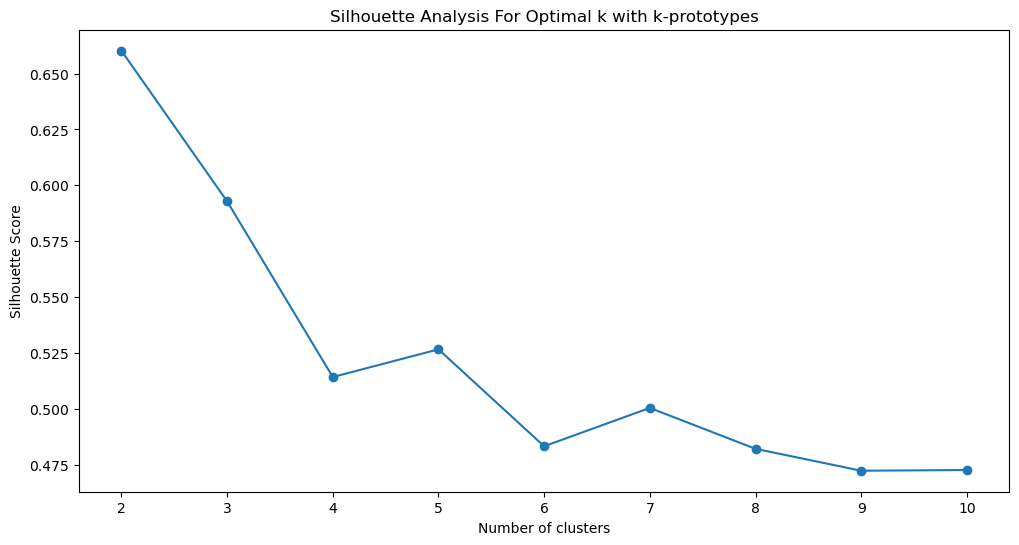

In [19]:
# Specify the column names of categorical attributes
categorical_columns = ['complaint', 'tariff_plan', 'active_status', 'churn']

silhouette_analysis(churn_df, categorical_columns, max_clusters=10, verbose=False)

## Factor Analysis of Mixed Data + K-Means

In [20]:
# Load cleaned dataset
churn_df = pd.read_csv('/Users/williamjowens/Desktop/Datasets/clean_df.csv')
churn_df.head()

,call_failures,complaint,months_subscribed,charge_amt,total_call_secs,total_calls,total_texts,distinct_calls,age_group,tariff_plan,active_status,customer_value,churn
0,8,0,38,0,4370,71,5,17,3,0,1,197.640,0
1,0,0,39,0,318,5,7,4,2,0,0,46.035,0
2,10,0,37,0,2453,60,359,24,3,0,1,1536.520,0
3,10,0,38,0,4198,66,1,35,1,0,1,240.020,0
4,3,0,38,0,2393,58,2,33,1,0,1,145.805,0


In [21]:
def perform_famd_and_kmeans(data, columns_to_recode, n_components, n_clusters, random_state=42):
    """
    Perform FAMD followed by k-means clustering on a given dataset.

    Parameters:
    data (pd.DataFrame): The data on which to perform FAMD and k-means clustering.
    columns_to_recode (list of str): The columns to recode as strings for FAMD.
    n_components (int): The number of components for FAMD.
    n_clusters (int): The number of clusters for k-means.
    random_state (int): The random state for reproducibility.

    Returns:
    pd.DataFrame: The original data with an additional column for the cluster labels.
    """

    # Recode categorical variables as strings
    for col in columns_to_recode:
        data[col] = data[col].astype(str)

    # Perform FAMD
    famd = FAMD(
        n_components=n_components,
        n_iter=3,
        copy=True,
        check_input=True,
        random_state=random_state,
        engine="sklearn"
    )
    famd = famd.fit(data)

    # Get the row coordinates from FAMD (this is equivalent to the transformed features)
    famd_coordinates = famd.row_coordinates(data)

    # Perform k-means clustering on the FAMD results
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=random_state)
    data['cluster_label'] = kmeans.fit_predict(famd_coordinates)

    return data, famd

In [22]:
# Columns to recode as strings
columns_to_recode = ['complaint', 'tariff_plan', 'active_status', 'churn']

# Number of components for FAMD and clusters for k-means
n_components = 2
n_clusters = 4

# Perform FAMD and k-means clustering
clustered_data, famd = perform_famd_and_kmeans(churn_df, columns_to_recode, n_components, n_clusters)

# Print the first few rows
clustered_data.head()

,call_failures,complaint,months_subscribed,charge_amt,total_call_secs,total_calls,total_texts,distinct_calls,age_group,tariff_plan,active_status,customer_value,churn,cluster_label
0,8,0,38,0,4370,71,5,17,3,0,1,197.640,0,2
1,0,0,39,0,318,5,7,4,2,0,0,46.035,0,3
2,10,0,37,0,2453,60,359,24,3,0,1,1536.520,0,2
3,10,0,38,0,4198,66,1,35,1,0,1,240.020,0,2
4,3,0,38,0,2393,58,2,33,1,0,1,145.805,0,2


In [23]:
def plot_famd_kmeans_clusters(data, famd, kmeans_labels_column='cluster_label'):
    """
    Plots the 2D representation of FAMD results colored by k-means cluster labels.

    Parameters:
    data (pd.DataFrame): The data used for FAMD and k-means clustering.
    famd (FAMD): The fitted FAMD model.
    kmeans_labels_column (str): The name of the column containing k-means cluster labels.

    """
    # Get the row coordinates from FAMD (this is equivalent to the transformed features)
    famd_coordinates = famd.row_coordinates(data)

    # Create a scatter plot of the two main components obtained from FAMD
    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        x=famd_coordinates[0], 
        y=famd_coordinates[1], 
        hue=data[kmeans_labels_column], 
        palette=sns.color_palette("hsv", len(data[kmeans_labels_column].unique())),
        data=data
    )
    plt.title('Clusters from FAMD and K-means')
    plt.xlabel('FAMD Component 1')
    plt.ylabel('FAMD Component 2')
    plt.legend(title='Cluster')
    plt.show()

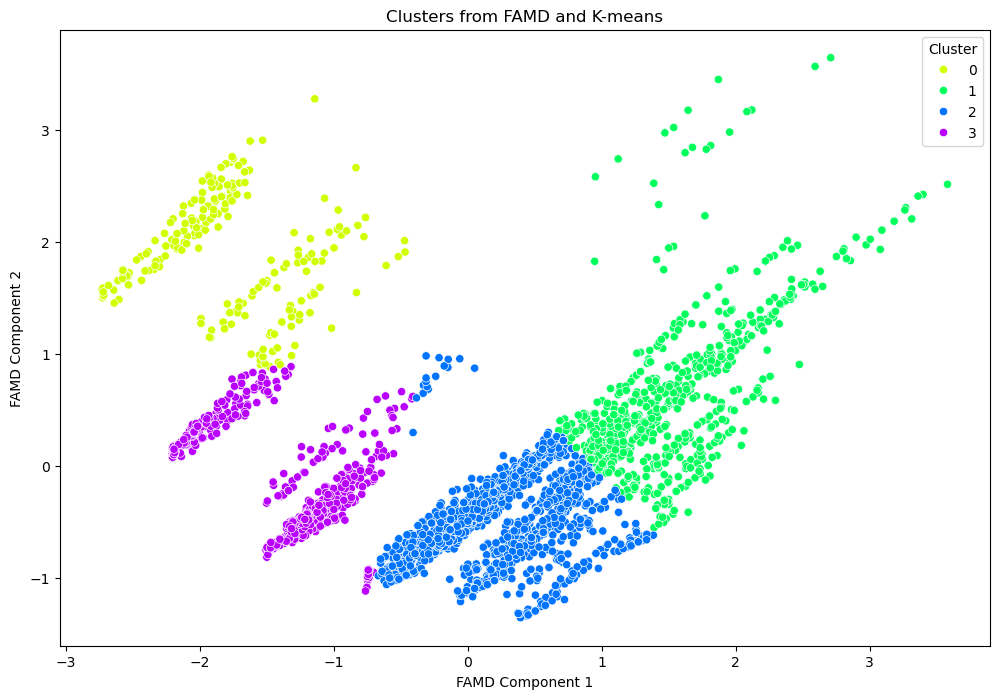

In [24]:
plot_famd_kmeans_clusters(churn_df, famd)

In [25]:
def find_optimal_clusters_famd(data, columns_to_recode, n_components, max_k=15, random_state=42):
    """
    Applies FAMD on data and then uses the elbow method to find the optimal number of clusters for K-Means.

    Parameters:
    - data (DataFrame): The dataset to find optimal clusters for.
    - columns_to_recode (list of str): The columns to recode as strings for FAMD.
    - n_components (int): The number of components for FAMD.
    - max_k (int): The maximum number of clusters to test.
    - random_state (int): The random state for reproducibility.

    Returns:
    - Elbow plot.
    """
    # Recode categorical variables as strings
    for col in columns_to_recode:
        data[col] = data[col].astype(str)

    # Perform FAMD
    famd = FAMD(
        n_components=n_components,
        n_iter=3,
        copy=True,
        check_input=True,
        random_state=random_state,
        engine="sklearn"
    )
    famd = famd.fit(data)

    # Get the row coordinates from FAMD (this is equivalent to the transformed features)
    famd_coordinates = famd.row_coordinates(data)

    sum_of_squared_distances = []
    K = range(1, max_k+1)
    for k in K:
        k_means = KMeans(n_clusters=k, random_state=random_state, n_init=10)
        model = k_means.fit(famd_coordinates)
        sum_of_squared_distances.append(k_means.inertia_)

    # Plot the elbow chart
    plt.figure(figsize=(10,6))
    plt.plot(K, sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum of Squared Distances')
    plt.title('Elbow Method For Optimal k')
    plt.grid(False)
    plt.show()

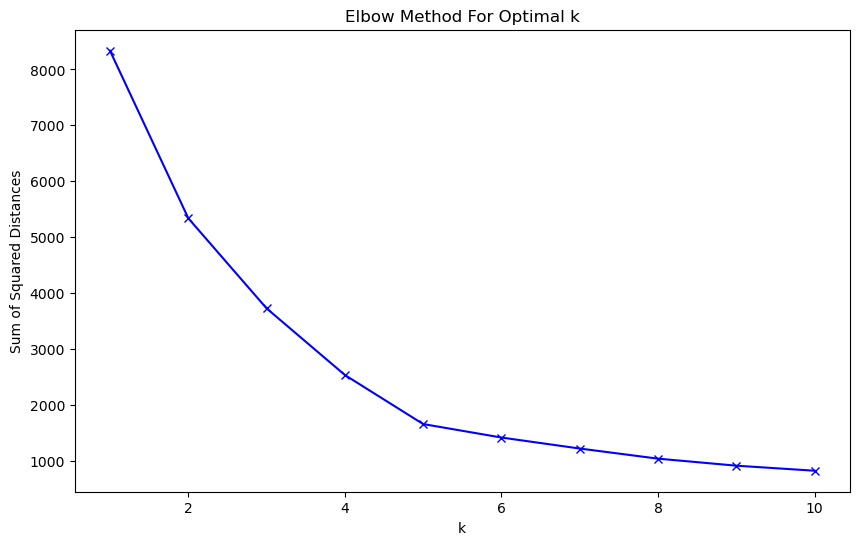

In [26]:
# Call the function
columns_to_recode = ['complaint', 'tariff_plan', 'active_status', 'churn']
n_components = 3
max_k = 10
find_optimal_clusters_famd(churn_df, columns_to_recode, n_components, max_k)

In [27]:
def silhouette_analysis_famd_kmeans(data, columns_to_recode, n_components, max_k=10, random_state=42):
    """
    Performs silhouette analysis on FAMD-reduced data with k-means clustering and plots silhouette scores for various numbers of clusters.

    Parameters:
    - data (DataFrame): The original dataset to perform FAMD and silhouette analysis on.
    - columns_to_recode (list of str): The columns to recode as strings for FAMD.
    - n_components (int): The number of components for FAMD.
    - max_k (int): The maximum number of clusters to test for k-means.
    - random_state (int): The random state for reproducibility.

    Returns:
    - Shows a series of plots.
    """
    # Recode categorical variables as strings
    for col in columns_to_recode:
        data[col] = data[col].astype(str)

    # Perform FAMD
    famd = FAMD(
        n_components=n_components,
        n_iter=3,
        copy=True,
        check_input=True,
        random_state=random_state,
        engine="sklearn"
    )
    famd = famd.fit(data)

    # Get the row coordinates from FAMD (this is equivalent to the transformed features)
    famd_coordinates = famd.row_coordinates(data)

    range_n_clusters = range(2, max_k+1)
    
    for n_clusters in range_n_clusters:
        # Perform k-means clustering on the FAMD results
        kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10)
        cluster_labels = kmeans.fit_predict(famd_coordinates)

        # Calculate silhouette scores
        silhouette_avg = silhouette_score(famd_coordinates, cluster_labels)
        sample_silhouette_values = silhouette_samples(famd_coordinates, cluster_labels)

        # Plot silhouette scores
        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(8, 5)

        ax1.set_xlim([-0.1, 1])
        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        ax1.set_title("The Silhouette plot for " + str(n_clusters) + " clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

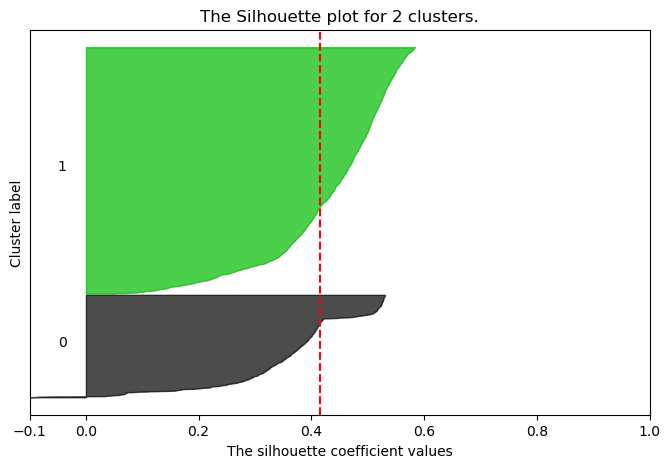

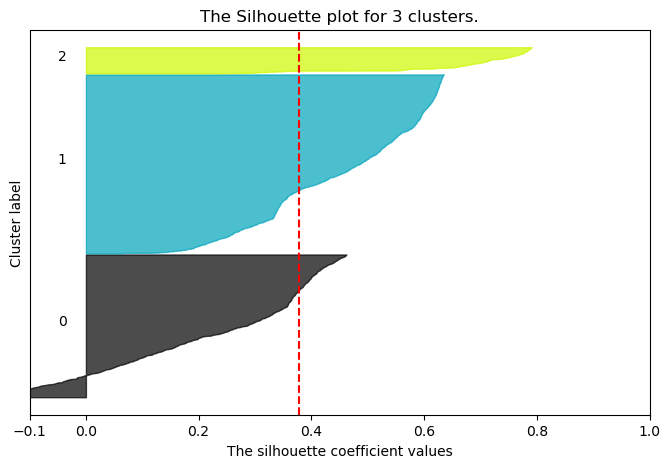

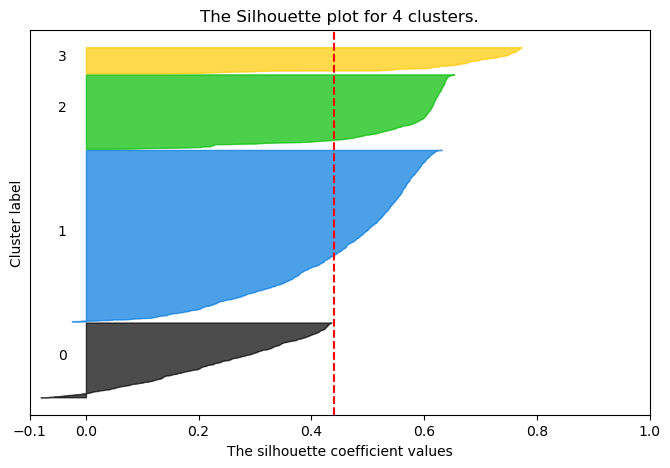

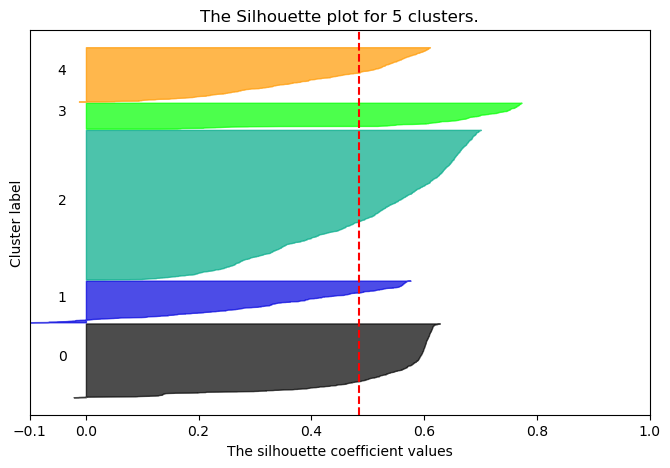

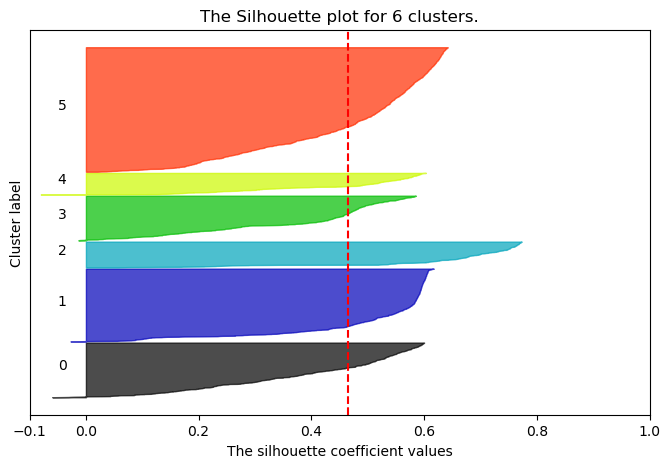

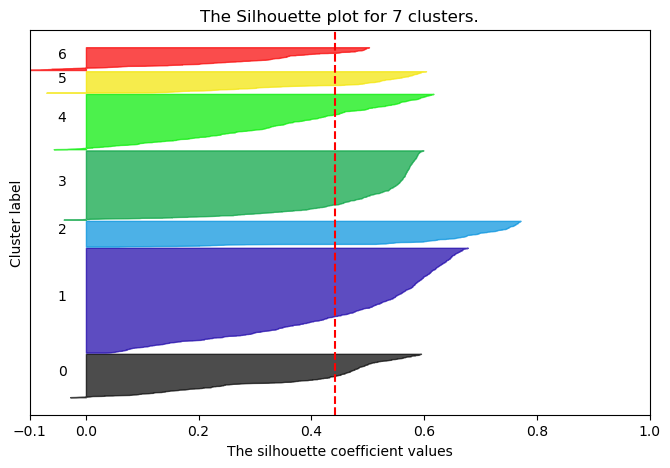

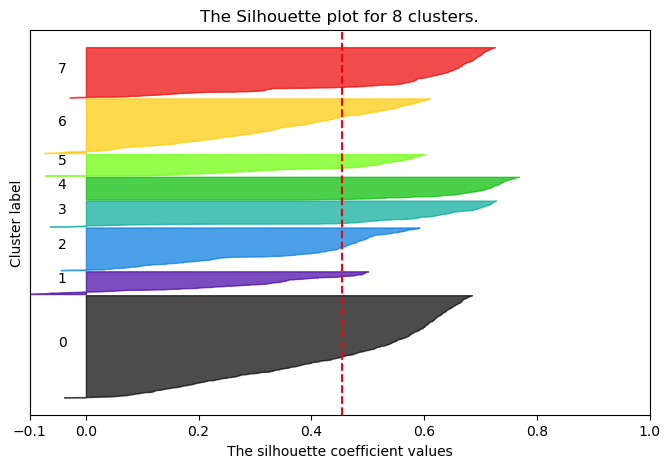

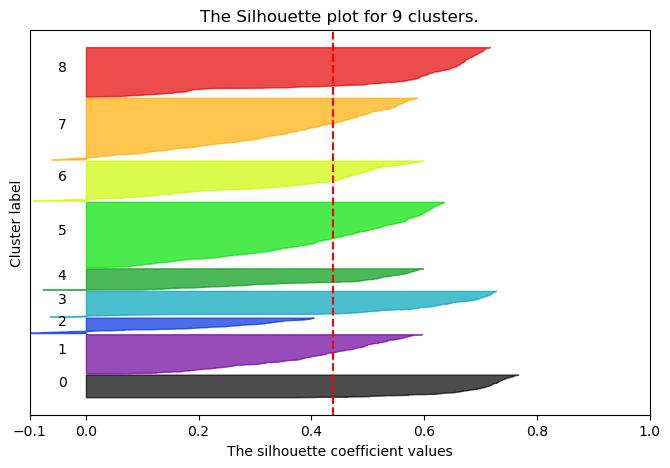

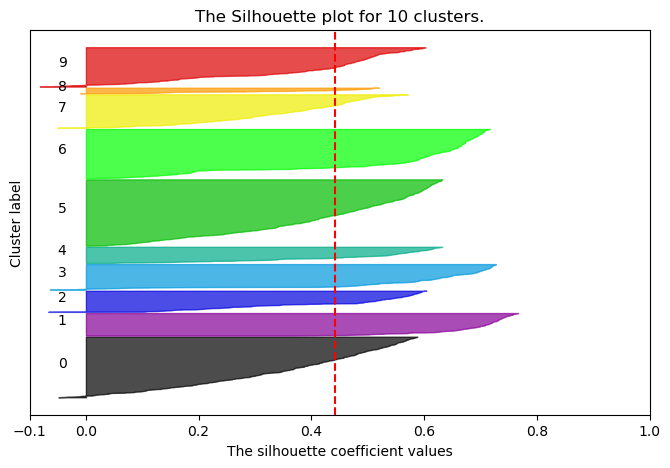

In [28]:
# Call the function with the data
columns_to_recode = ['complaint', 'tariff_plan', 'active_status', 'churn']
silhouette_analysis_famd_kmeans(churn_df, columns_to_recode, n_components=3, max_k=10, random_state=42)

In [29]:
# Columns to recode as strings
columns_to_recode = ['complaint', 'tariff_plan', 'active_status', 'churn']

# Number of components for FAMD and clusters for k-means
n_components = 2
n_clusters = 3

# Perform FAMD and k-means clustering
clustered_data, famd = perform_famd_and_kmeans(churn_df, columns_to_recode, n_components, n_clusters)

# Print the first few rows
clustered_data.head()

,call_failures,complaint,months_subscribed,charge_amt,total_call_secs,total_calls,total_texts,distinct_calls,age_group,tariff_plan,active_status,customer_value,churn,cluster_label
0,8,0,38,0,4370,71,5,17,3,0,1,197.640,0,0
1,0,0,39,0,318,5,7,4,2,0,0,46.035,0,0
2,10,0,37,0,2453,60,359,24,3,0,1,1536.520,0,0
3,10,0,38,0,4198,66,1,35,1,0,1,240.020,0,0
4,3,0,38,0,2393,58,2,33,1,0,1,145.805,0,0


In [30]:
clustered_data.groupby('cluster_label').agg({'mean', 'count'})

call_failures       complaint       months_subscribed        \
                       mean count      mean count              mean count   
cluster_label                                                               
0                     5.024  1902     0.000  1902            31.899  1902   
1                     7.787   446       inf   446            33.487   446   
2                    13.714   802       inf   802            33.541   802   

              charge_amt       total_call_secs       total_calls        \
                    mean count            mean count        mean count   
cluster_label                                                            
0                  0.562  1902        2869.249  1902      47.647  1902   
1                  0.148   446        1399.422   446      27.753   446   
2                  2.289   802        9983.535   802     144.387   802   

              total_texts       distinct_calls       age_group        \
                     mean count           mean count      mean count   
cluster_label                                                          
0                  66.662  1902         18.477  1902     2.803  1902   
1                  16.695   446         12.648   446     2.848   446   
2                 120.029   802         41.485   802     2.868   802   

              tariff_plan       active_status       customer_value        \
                     mean count          mean count           mean count   
cluster_label                                                              
0                     inf  1902           inf  1902        380.984  1902   
1                     inf   446           inf   446        119.119   446   
2                     inf   802           inf   802        880.058   802   

              churn        
               mean count  
cluster_label              
0               inf  1902  
1               inf   446  
2             0.000   802

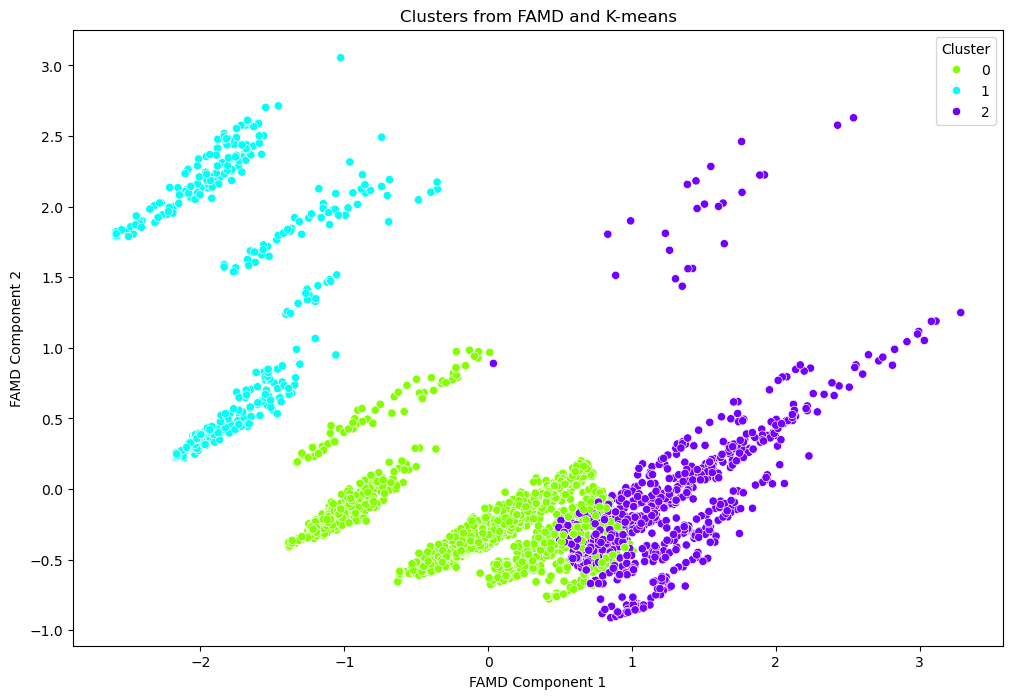

In [31]:
plot_famd_kmeans_clusters(churn_df, famd)

## Agglomerative with Gower's Distance

In [32]:
# Load cleaned dataset
churn_df = pd.read_csv('/Users/williamjowens/Desktop/Datasets/clean_df.csv')
churn_df.head()

,call_failures,complaint,months_subscribed,charge_amt,total_call_secs,total_calls,total_texts,distinct_calls,age_group,tariff_plan,active_status,customer_value,churn
0,8,0,38,0,4370,71,5,17,3,0,1,197.640,0
1,0,0,39,0,318,5,7,4,2,0,0,46.035,0
2,10,0,37,0,2453,60,359,24,3,0,1,1536.520,0
3,10,0,38,0,4198,66,1,35,1,0,1,240.020,0
4,3,0,38,0,2393,58,2,33,1,0,1,145.805,0


In [33]:
def calculate_gowers_distance_matrix(data):
    """
    Calculate Gower's distance matrix for the given data.
    
    Parameters:
        data (DataFrame): The dataset (mixed data).
        
    Returns:
        np.array: Gower's distance matrix.
    """
    return gower.gower_matrix(data)

In [34]:
def perform_agglomerative_clustering(distance_matrix):
    """
    Perform agglomerative clustering on the data using the precomputed distance matrix.
    
    Parameters:
        distance_matrix (np.array): Precomputed distance matrix.
        
    Returns:
        AgglomerativeClustering: Fitted clustering model.
    """
    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, 
                                    metric='precomputed', linkage='complete')
    model = model.fit(distance_matrix)
    return model

In [35]:
def plot_dendrogram(model, **kwargs):
    """
    Plot a dendrogram based on the hierarchical clustering.
    
    Parameters:
        model (AgglomerativeClustering): Fitted clustering model.
        **kwargs: Other keyword arguments for the dendrogram.
    """
    # Create linkage matrix and then plot the dendrogram
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [36]:
# Step 1: Calculate Gower's distance matrix
gower_dist_matrix = calculate_gowers_distance_matrix(churn_df)

In [37]:
# Step 2: Perform agglomerative clustering
model = perform_agglomerative_clustering(gower_dist_matrix)

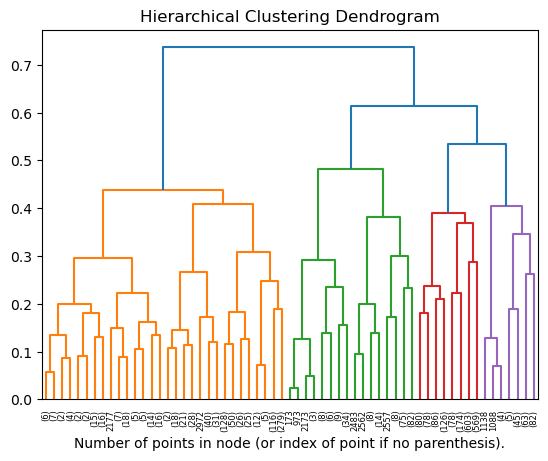

In [38]:
# Step 3: Plot the dendrogram
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [39]:
def perform_agglomerative_clustering_and_update_data(data, distance_matrix, n_clusters):
    """
    Perform agglomerative clustering on the data using the precomputed distance matrix
    and update the original data with cluster labels.
    
    Parameters:
        data (DataFrame): The original dataset.
        distance_matrix (np.array): Precomputed distance matrix.
        n_clusters (int): The number of clusters to form.
        
    Returns:
        DataFrame: The original data with an additional column for the cluster labels.
    """
    # Perform agglomerative clustering with the specified number of clusters
    model = AgglomerativeClustering(n_clusters=n_clusters, metric='precomputed', linkage='complete')
    model = model.fit(distance_matrix)
    
    # Add cluster labels to the original data
    data['cluster_label'] = model.labels_
    
    return data

In [40]:
def summarize_clusters(data, cluster_column_name):
    """
    Group data by cluster labels and calculate summary statistics for each group.

    Parameters:
        data (DataFrame): The dataset containing cluster labels.
        cluster_column_name (str): The name of the column containing cluster labels.

    Returns:
        DataFrame: Summary statistics for each cluster.
    """
    # Group the data by cluster labels
    grouped = data.groupby(cluster_column_name)

    # Calculate summary statistics for each group
    summary = grouped.agg(['mean', 'std', 'min', 'max', 'count'])

    return summary

In [41]:
# Define the number of clusters decided on after observing the dendrogram
n_clusters = 6

# Perform agglomerative clustering and update original data with cluster labels
churn_df_with_clusters = perform_agglomerative_clustering_and_update_data(churn_df, gower_dist_matrix, n_clusters)

# Use the `summarize_clusters` function on this updated DataFrame
summary = summarize_clusters(churn_df_with_clusters, 'cluster_label')
display(summary.T)

cluster_label                  0         1        2         3         4  \
call_failures     mean     6.179     6.383    9.274    19.695    21.000   
                  std      7.011     5.452    6.815     9.075     5.149   
                  min      0.000     0.000    0.000     0.000    10.000   
                  max     34.000    24.000   27.000    36.000    32.000   
                  count  782.000  1794.000  201.000   190.000    63.000   
complaint         mean     0.202     0.000    0.060     0.058     0.095   
                  std      0.402     0.000    0.238     0.234     0.296   
                  min      0.000     0.000    0.000     0.000     0.000   
                  max      1.000     0.000    1.000     1.000     1.000   
                  count  782.000  1794.000  201.000   190.000    63.000   
months_subscribed mean    34.673    32.658   25.836    35.353    36.000   
                  std      5.351     8.901    7.909     4.589     3.408   
                  min      5.000     3.000    9.000    23.000    28.000   
                  max     47.000    46.000   42.000    46.000    44.000   
                  count  782.000  1794.000  201.000   190.000    63.000   
charge_amt        mean     0.000     0.873    1.910     2.195     7.841   
                  std      0.000     1.025    1.524     1.629     1.505   
                  min      0.000     0.000    0.000     0.000     1.000   
                  max      0.000     5.000    6.000     6.000    10.000   
                  count  782.000  1794.000  201.000   190.000    63.000   
total_call_secs   mean  1108.176  4631.541 4868.204 15537.474 10435.000   
                  std    940.937  3177.467 2540.851   685.892   402.564   
                  min      0.000     0.000  300.000 10020.000  9420.000   
                  max   4005.000 14788.000 9715.000 17090.000 11450.000   
                  count  782.000  1794.000  201.000   190.000    63.000   
total_calls       mean    24.035    71.878   95.791   214.589    93.000   
                  std     19.708    44.184   45.269    25.953     8.365   
                  min      0.000     0.000   19.000   137.000    76.000   
                  max     71.000   188.000  158.000   255.000   110.000   
                  count  782.000  1794.000  201.000   190.000    63.000   
total_texts       mean    15.340    93.614  176.065    70.232     7.206   
                  std     15.605   131.916   81.123    61.455     9.223   
                  min      0.000     0.000   31.000     0.000     0.000   
                  max     77.000   522.000  310.000   189.000    40.000   
                  count  782.000  1794.000  201.000   190.000    63.000   
distinct_calls    mean    11.137    25.851   28.871    47.400    42.000   
                  std      9.710    15.347   13.982    23.861     5.902   
                  min      0.000     0.000    1.000    13.000    25.000   
                  max     48.000    85.000   59.000    97.000    59.000   
                  count  782.000  1794.000  201.000   190.000    63.000   
age_group         mean     2.830     2.909    2.134     2.321     4.571   
                  std      0.712     0.936    0.630     0.468     0.499   
                  min      2.000     1.000    1.000     2.000     4.000   
                  max      4.000     5.000    4.000     3.000     5.000   
                  count  782.000  1794.000  201.000   190.000    63.000   
tariff_plan       mean     0.001     0.001    1.000     0.126     0.286   
                  std      0.036     0.024    0.000     0.333     0.455   
                  min      0.000     0.000    1.000     0.000     0.000   
                  max      1.000     1.000    1.000     1.000     1.000   
                  count  782.000  1794.000  201.000   190.000    63.000   
active_status     mean     0.000     1.000    1.000     1.000     1.000   
                  std      0.000     0.000    0.000     0.000     0.000   
                  min    

In [42]:
def plot_cluster_summary(data, cluster_column_name, num_cols, cat_cols):
    """
    Plot a summary of the clusters for specified numerical and categorical features.
    
    Parameters:
        data (DataFrame): The dataset containing cluster labels.
        cluster_column_name (str): The name of the column containing cluster labels.
        num_cols (list): List of numerical column names.
        cat_cols (list): List of categorical column names.
    """
    # Validate that provided column names exist in the dataframe
    all_cols = set(num_cols + cat_cols + [cluster_column_name])
    if not all_cols.issubset(data.columns):
        missing_cols = all_cols - set(data.columns)
        raise ValueError(f"The following columns are missing from the dataset: {missing_cols}")

    # Define the number of subplots based on the number of numerical columns
    num_plots = len(num_cols)
    plt.figure(figsize=(15, 4*num_plots))

    # Create box plots for numerical columns
    for i, col in enumerate(num_cols, 1):
        plt.subplot(num_plots, 1, i)
        sns.boxplot(x=cluster_column_name, y=col, data=data)
        plt.title(f'Distribution of {col} in Clusters')

    plt.tight_layout()
    plt.show()

    # Create bar plots for categorical columns
    for col in cat_cols:
        # Count the frequency of each category in each cluster
        count_data = data.groupby([cluster_column_name, col]).size().reset_index(name='counts')

        # Create the bar plot
        plt.figure(figsize=(10, 6))
        sns.barplot(x=cluster_column_name, y='counts', hue=col, data=count_data)
        plt.title(f'Count of {col} in clusters')
        plt.show()

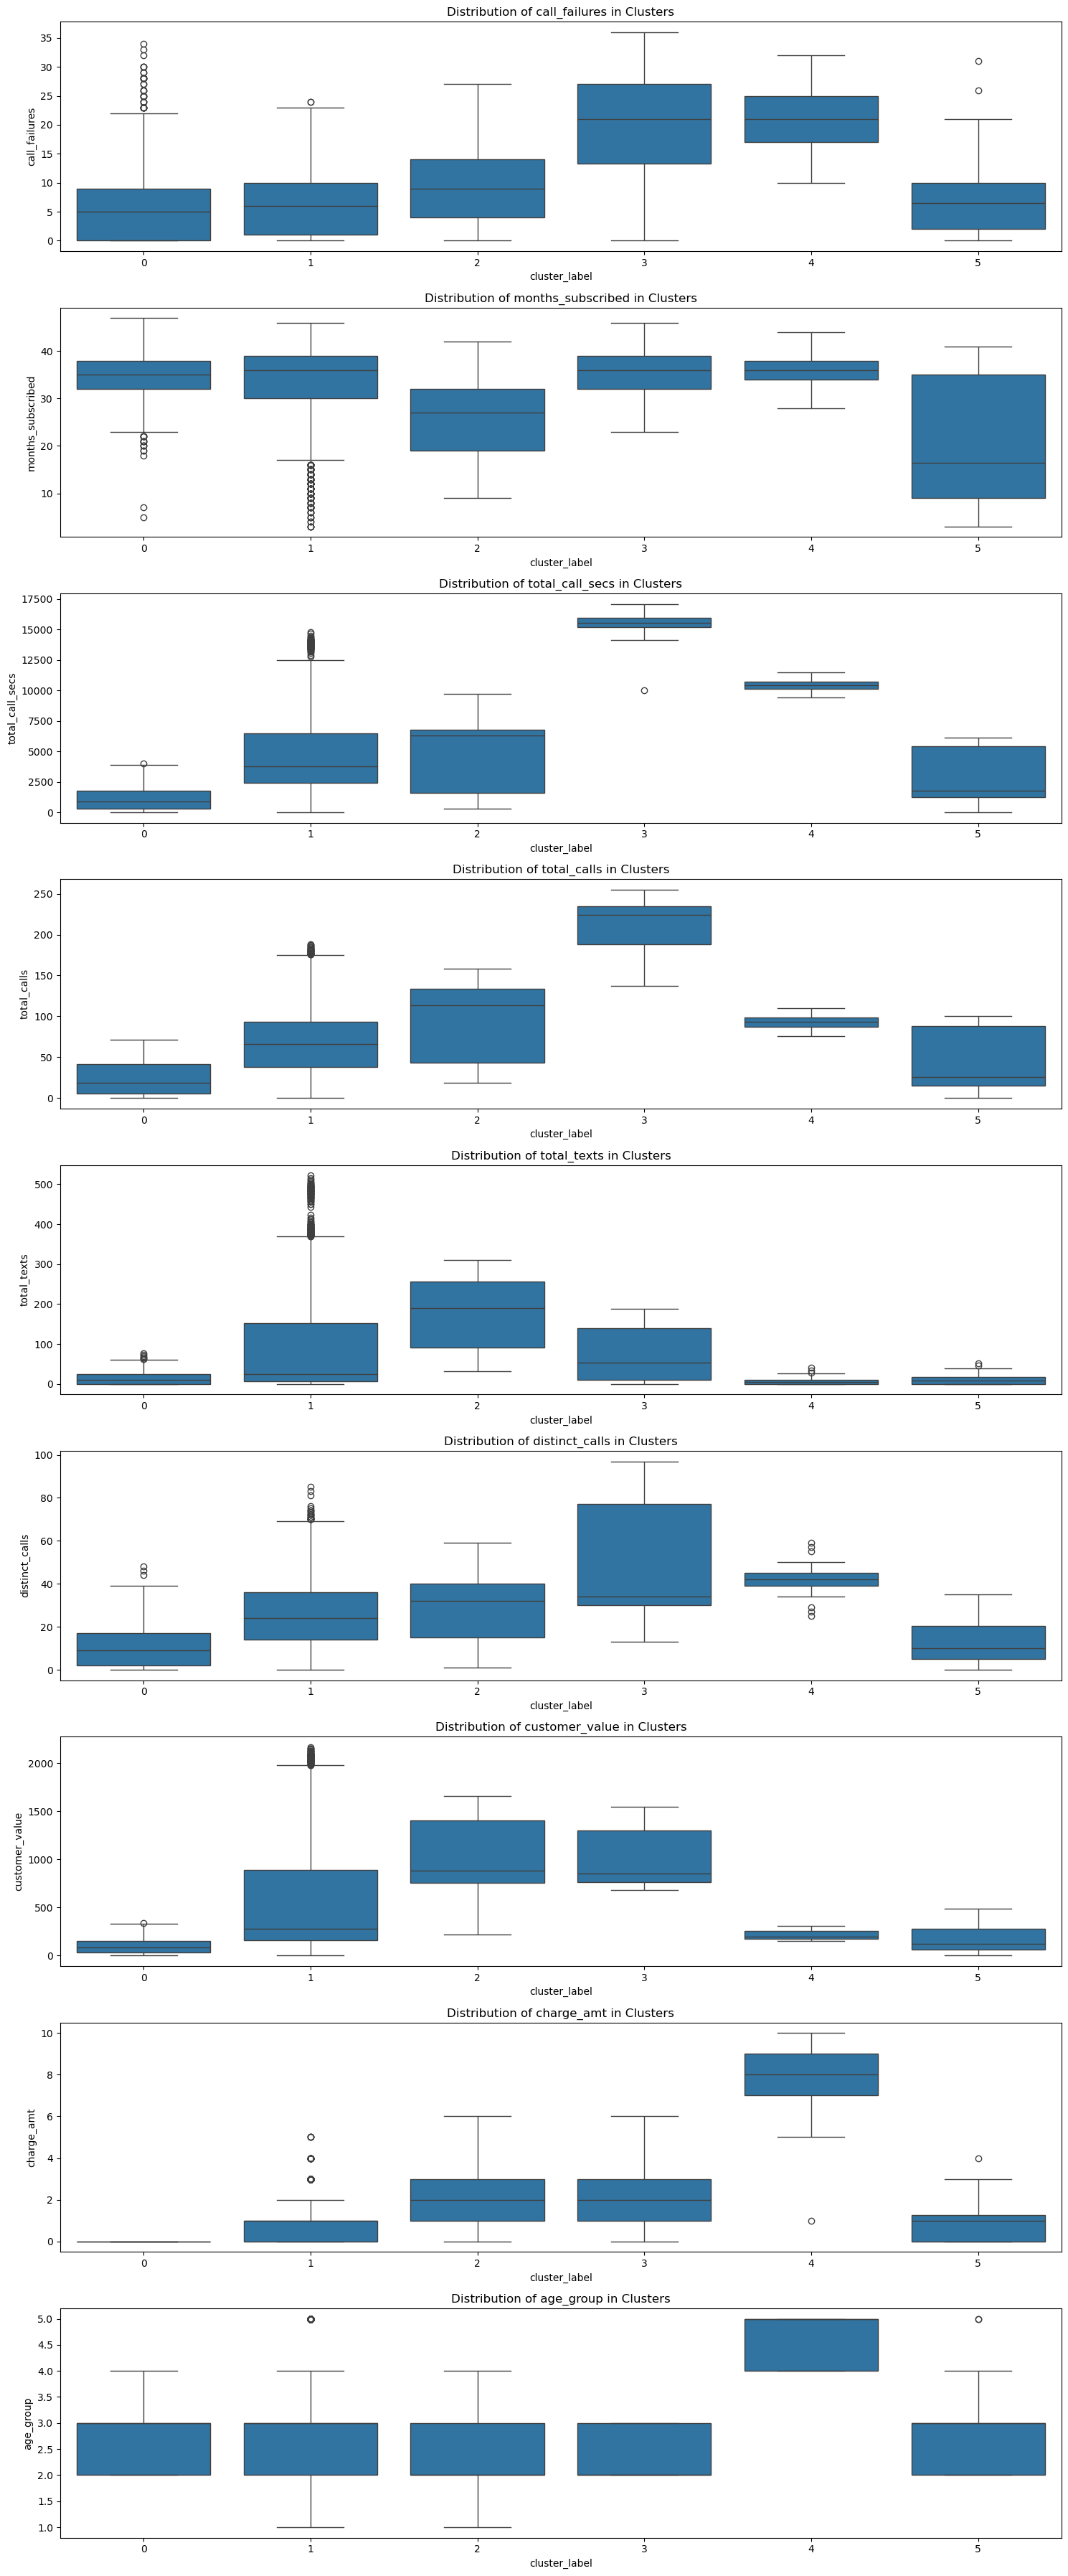

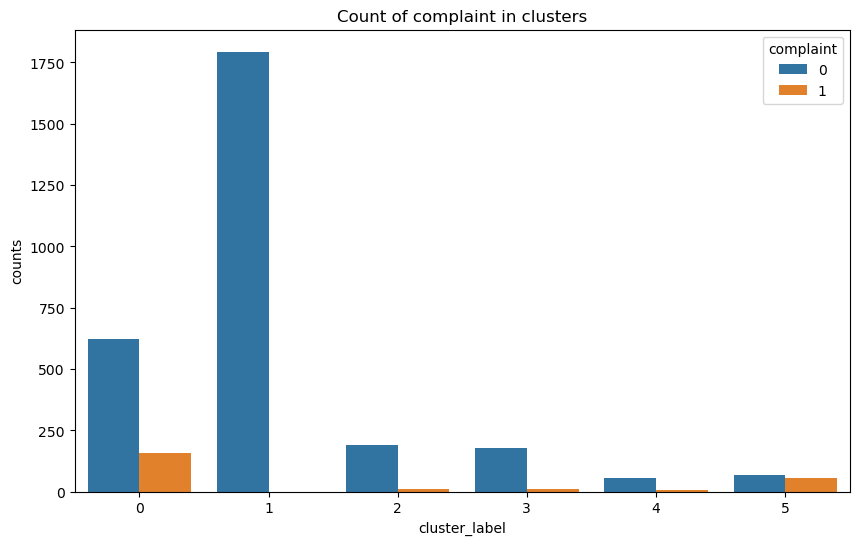

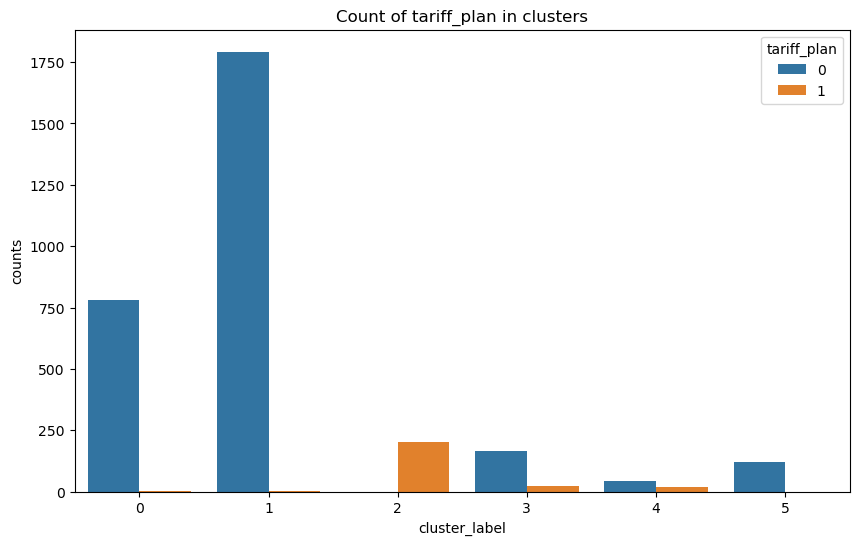

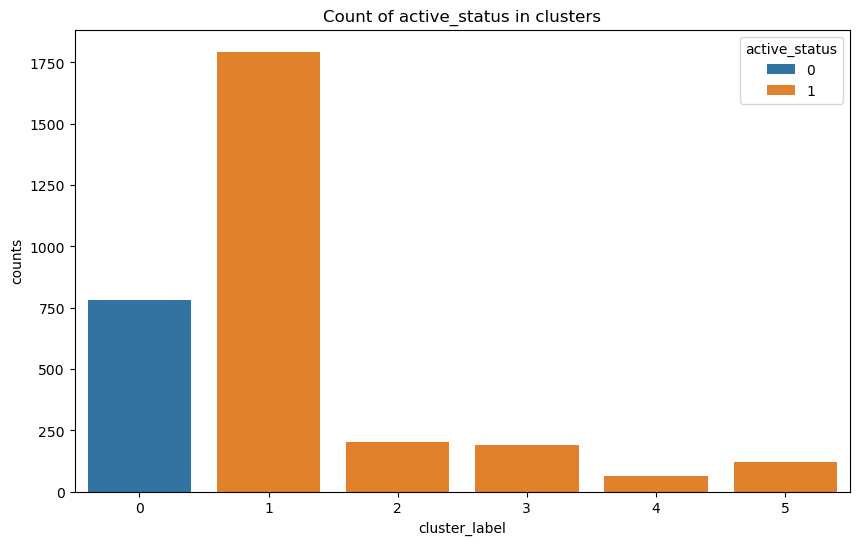

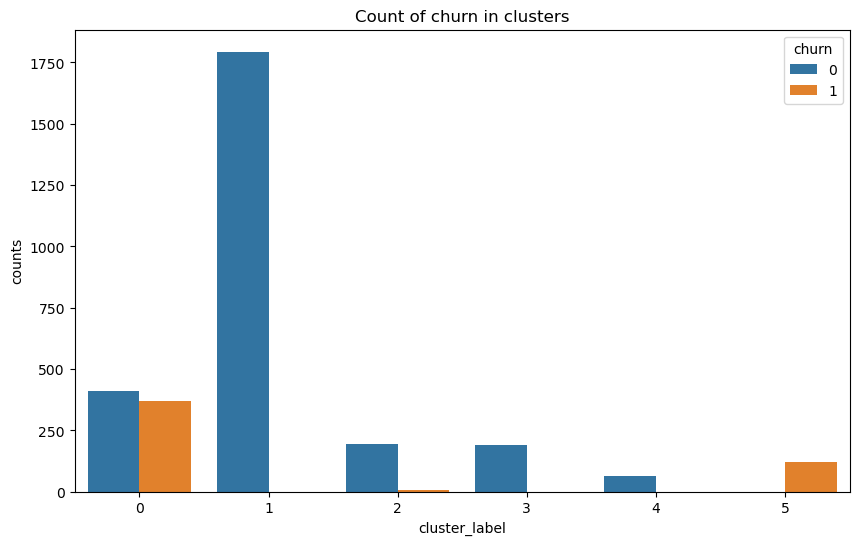

In [43]:
# Specify numerical and categorical columns
numerical_columns = ['call_failures', 'months_subscribed', 'total_call_secs', 'total_calls', 'total_texts', 'distinct_calls', 
                     'customer_value', 'charge_amt', 'age_group']
categorical_columns = ['complaint', 'tariff_plan', 'active_status', 'churn']

cluster_column_name = 'cluster_label'

# Plotting the cluster summary
plot_cluster_summary(churn_df_with_clusters, cluster_column_name, numerical_columns, categorical_columns)

## K-Medoids with Gower's Distance

In [44]:
# Load cleaned dataset
churn_df = pd.read_csv('/Users/williamjowens/Desktop/Datasets/clean_df.csv')
churn_df.head()

,call_failures,complaint,months_subscribed,charge_amt,total_call_secs,total_calls,total_texts,distinct_calls,age_group,tariff_plan,active_status,customer_value,churn
0,8,0,38,0,4370,71,5,17,3,0,1,197.640,0
1,0,0,39,0,318,5,7,4,2,0,0,46.035,0
2,10,0,37,0,2453,60,359,24,3,0,1,1536.520,0
3,10,0,38,0,4198,66,1,35,1,0,1,240.020,0
4,3,0,38,0,2393,58,2,33,1,0,1,145.805,0


In [45]:
def calculate_gowers_distance_matrix(data):
    """
    Calculate Gower's distance matrix for the given data.
    
    Parameters:
        data (DataFrame): The dataset (mixed data).
        
    Returns:
        np.array: Gower's distance matrix.
    """
    return gower.gower_matrix(data)

In [46]:
def plot_davies_bouldin_scores(data, distance_matrix, max_clusters):
    """
    Calculate and plot Davies-Bouldin scores for different numbers of clusters.
    
    Parameters:
        data (DataFrame): The original dataset.
        distance_matrix (np.array): Precomputed Gower's distance matrix.
        max_clusters (int): Maximum number of clusters to consider.
        
    Returns:
        int: Optimal number of clusters with the lowest Davies-Bouldin score.
    """
    db_scores = []
    range_clusters = range(2, max_clusters+1)

    for n_clusters in range_clusters:
        model = KMedoids(n_clusters=n_clusters, metric='precomputed', random_state=0)
        labels = model.fit_predict(distance_matrix)
        db_score = davies_bouldin_score(data, labels)
        db_scores.append(db_score)

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(range_clusters, db_scores, marker='o')
    plt.title('Davies-Bouldin scores vs Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Davies-Bouldin Score')
    plt.xticks(range_clusters)
    plt.show()

    # The optimal number of clusters is the one with the lowest Davies-Bouldin score
    optimal_clusters = range_clusters[np.argmin(db_scores)]
    print(f"Optimal number of clusters: {optimal_clusters}")
    return optimal_clusters

In [47]:
def perform_kmedoids_clustering(distance_matrix, n_clusters):
    """
    Perform K-medoids clustering on the data using the specified number of clusters.
    
    Parameters:
        distance_matrix (np.array): Precomputed Gower's distance matrix.
        n_clusters (int): The optimal number of clusters to use.
        
    Returns:
        np.array: Cluster labels.
    """
    kmedoids = KMedoids(n_clusters=n_clusters, metric='precomputed', random_state=0)
    kmedoids.fit(distance_matrix)
    return kmedoids.labels_

In [48]:
# Step 1: Calculate Gower's distance matrix
gower_dist_matrix = calculate_gowers_distance_matrix(churn_df)

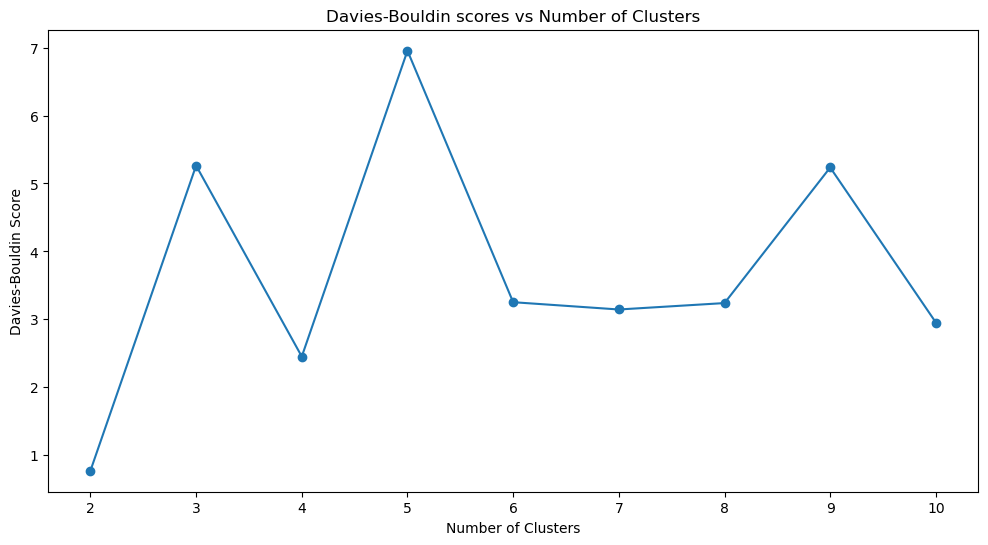

Optimal number of clusters: 2


In [49]:
# Step 2: Determine the optimal number of clusters using Davies-Bouldin scores
max_clusters = 10  # Define the maximum number of clusters you want to evaluate
optimal_clusters = plot_davies_bouldin_scores(churn_df, gower_dist_matrix, max_clusters)

In [50]:
# Step 3: Perform K-medoids clustering with the optimal number of clusters
labels = perform_kmedoids_clustering(gower_dist_matrix, optimal_clusters)

In [51]:
def perform_kmedoids_clustering_and_update_data(data, distance_matrix, n_clusters):
    """
    Perform K-medoids clustering on the data using the precomputed distance matrix
    and update the original data with cluster labels.
    
    Parameters:
        data (DataFrame): The original dataset.
        distance_matrix (np.array): Precomputed distance matrix.
        n_clusters (int): The number of clusters to form.
        
    Returns:
        DataFrame: The original data with an additional column for the cluster labels.
    """
    # Perform K-medoids clustering with the specified number of clusters
    kmedoids = KMedoids(n_clusters=n_clusters, metric='precomputed', random_state=0)
    kmedoids.fit(distance_matrix)
    
    # Add cluster labels to the original data
    data['cluster_label'] = kmedoids.labels_
    
    return data

In [52]:
# Define the number of clusters
n_clusters = 3

# Call the function
churn_df_with_clusters = perform_kmedoids_clustering_and_update_data(churn_df, gower_dist_matrix, n_clusters)

summary = summarize_clusters(churn_df_with_clusters, 'cluster_label')

display(summary.T)

cluster_label                   0        1         2
call_failures     mean      7.931    4.150    13.453
                  std       7.375    5.325     6.246
                  min       0.000    0.000     0.000
                  max      36.000   34.000    36.000
                  count   698.000 1558.000   894.000
complaint         mean      0.026    0.102     0.072
                  std       0.159    0.303     0.258
                  min       0.000    0.000     0.000
                  max       1.000    1.000     1.000
                  count   698.000 1558.000   894.000
months_subscribed mean     31.845   31.077    35.639
                  std       7.945    8.747     7.926
                  min       3.000    3.000     9.000
                  max      45.000   47.000    46.000
                  count   698.000 1558.000   894.000
charge_amt        mean      0.867    0.271     2.173
                  std       1.147    0.625     2.036
                  min       0.000    0.000     0.000
                  max       6.000    4.000    10.000
                  count   698.000 1558.000   894.000
total_call_secs   mean   7659.385 1688.308  6836.256
                  std    4549.146 1347.412  3970.882
                  min     605.000    0.000  1250.000
                  max   17090.000 6785.000 16640.000
                  count   698.000 1558.000   894.000
total_calls       mean    114.213   29.375   104.378
                  std      57.830   21.827    50.925
                  min      24.000    0.000    31.000
                  max     255.000   96.000   254.000
                  count   698.000 1558.000   894.000
total_texts       mean    145.583   40.430    73.707
                  std     116.949   96.650   107.195
                  min       0.000    0.000     0.000
                  max     416.000  515.000   522.000
                  count   698.000 1558.000   894.000
distinct_calls    mean     35.009   13.091    32.689
                  std      17.112   12.806    12.400
                  min       2.000    0.000     8.000
                  max      97.000   81.000    88.000
                  count   698.000 1558.000   894.000
age_group         mean      2.208    2.870     3.232
                  std       0.590    0.841     0.915
                  min       1.000    1.000     1.000
                  max       5.000    5.000     5.000
                  count   698.000 1558.000   894.000
tariff_plan       mean      0.216    0.015     0.079
                  std       0.412    0.121     0.271
                  min       0.000    0.000     0.000
                  max       1.000    1.000     1.000
                  count   698.000 1558.000   894.000
active_status     mean      0.999    0.535     0.937
                  std       0.038    0.499     0.242
                  min       0.000    0.000     0.000
                  max       1.000    1.000     1.000
                  count   698.000 1558.000   894.000
customer_value    mean    975.615  224.279   506.889
                  std     474.601  399.225   427.061
                  min     157.080    0.000    92.715
                  max    2148.030 2149.280  2165.280
                  count   698.000 1558.000   894.000
churn             mean      0.032    0.260     0.076
                  std       0.175    0.439     0.265
                  min       0.000    0.000     0.000
                  max       1.000    1.000     1.000
                  count   698.000 1558.000   894.000

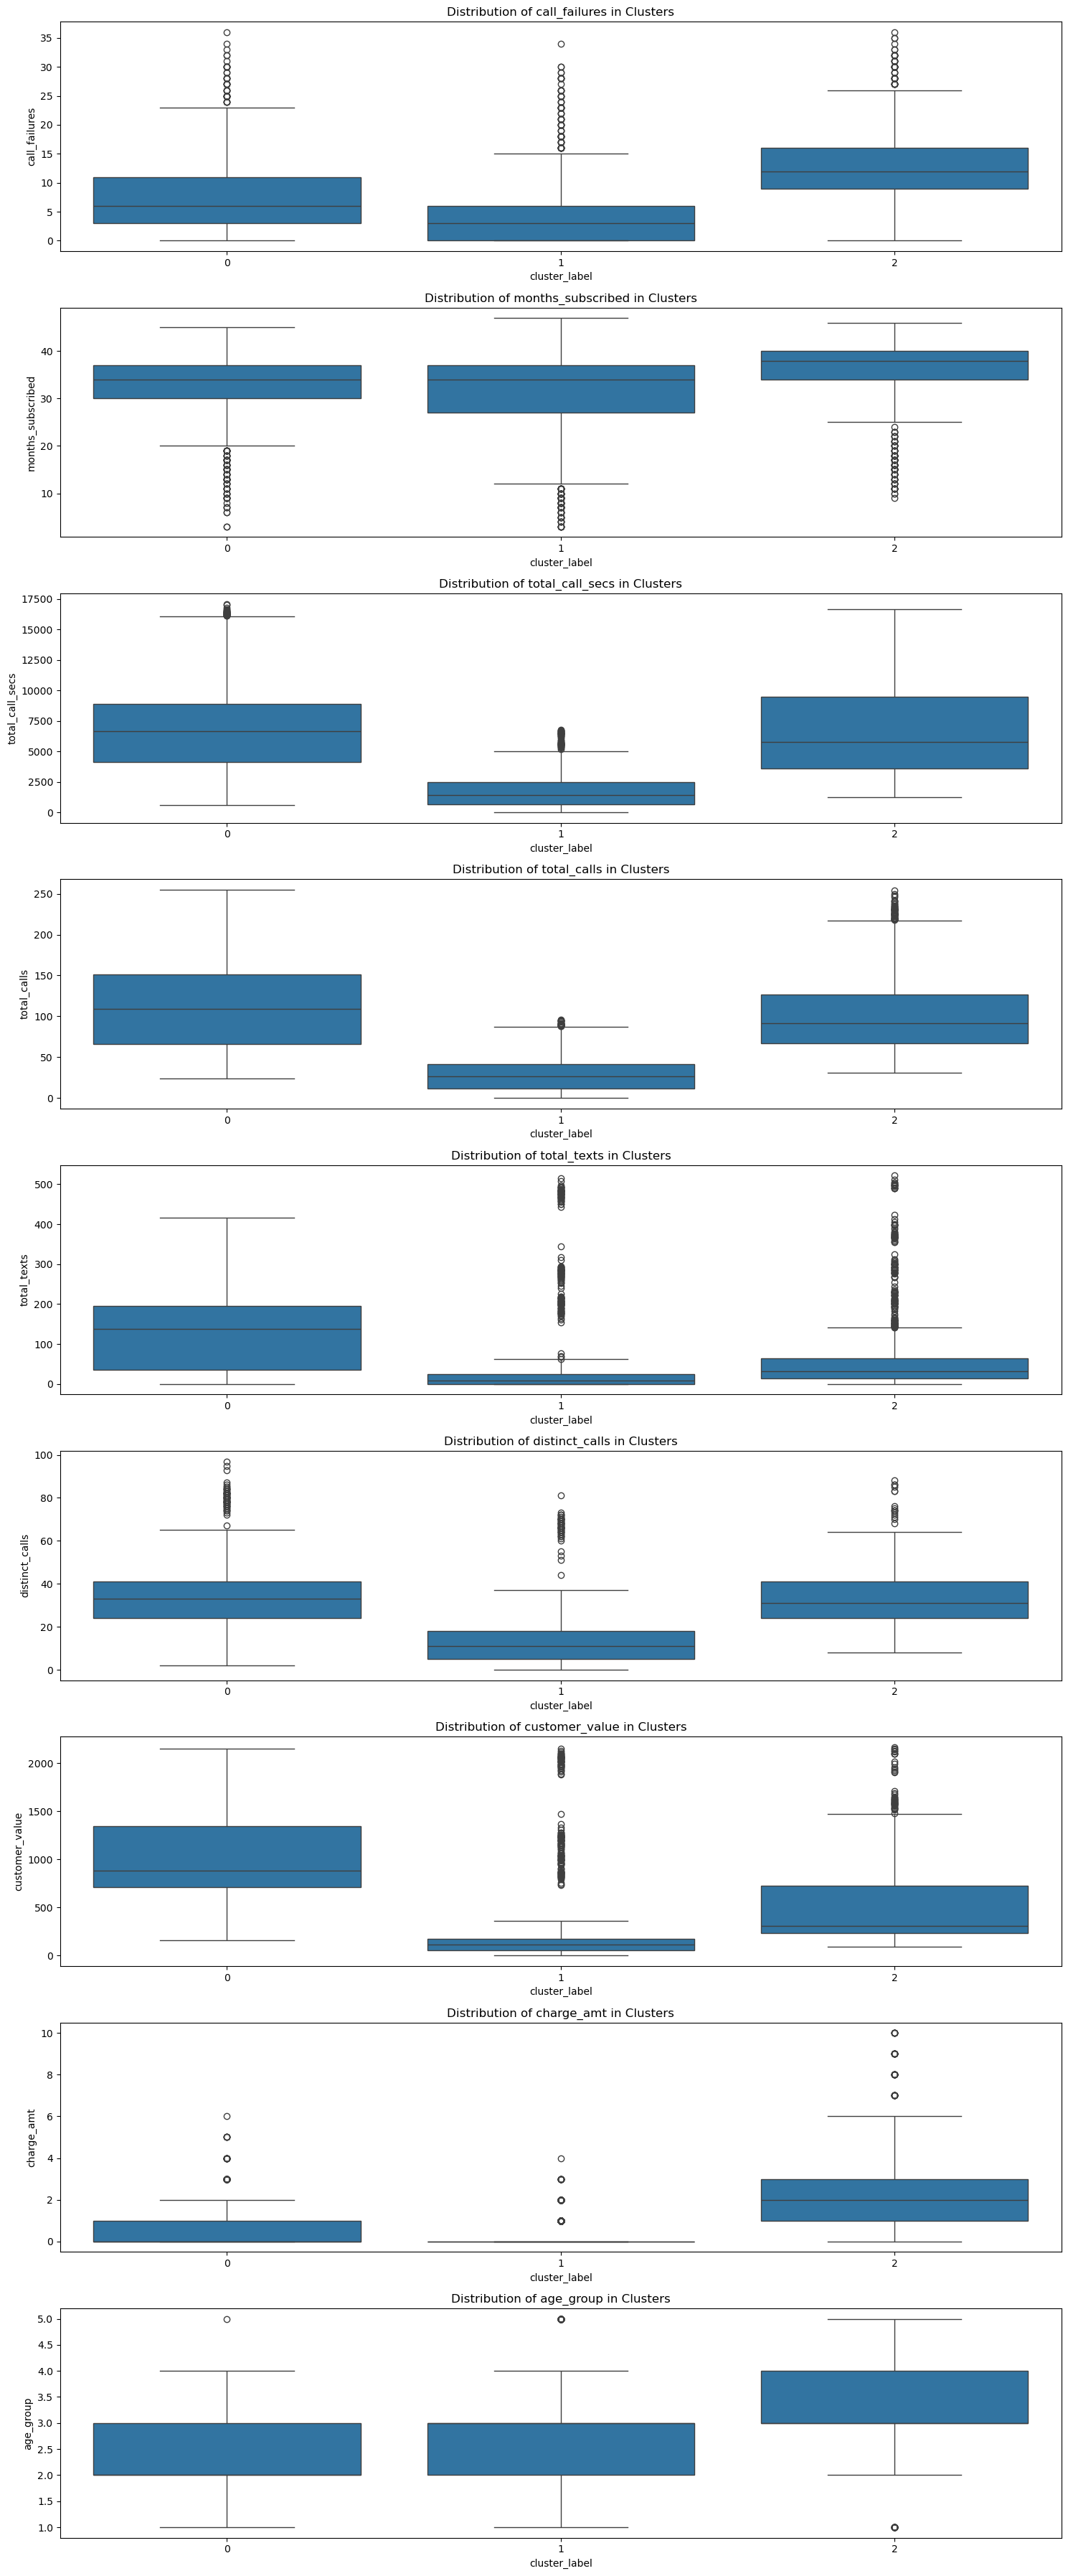

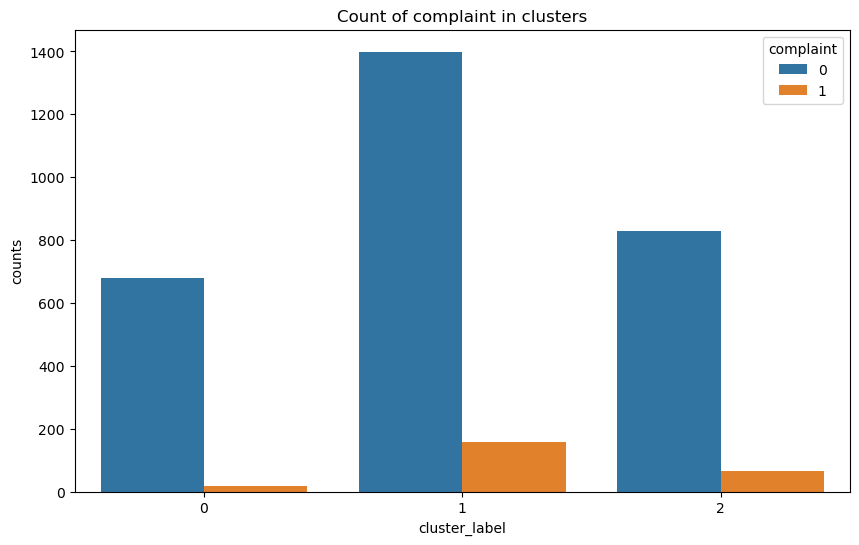

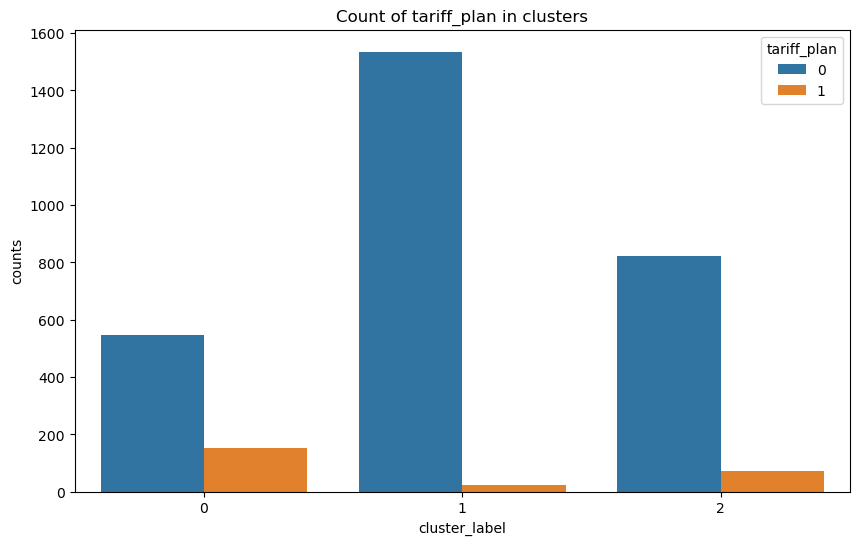

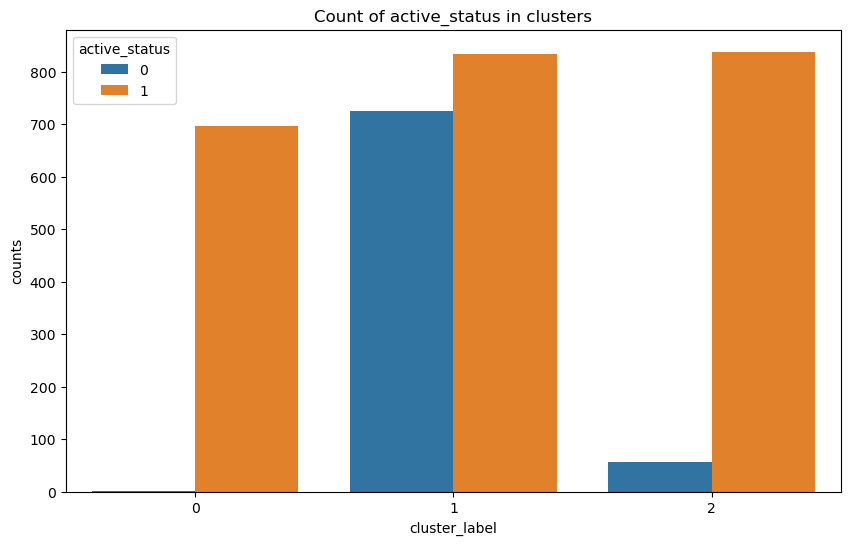

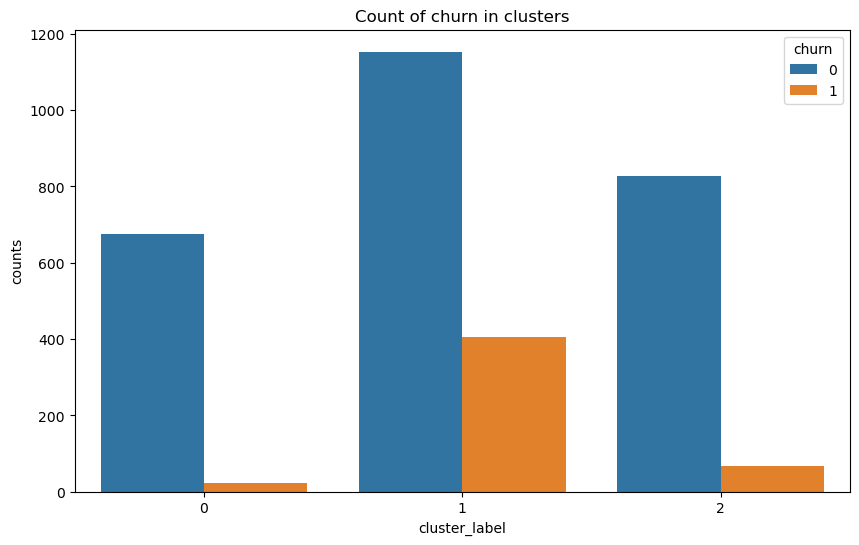

In [53]:
# Specify numerical and categorical columns
numerical_columns = ['call_failures', 'months_subscribed', 'total_call_secs', 'total_calls', 'total_texts', 'distinct_calls', 
                     'customer_value', 'charge_amt', 'age_group']
categorical_columns = ['complaint', 'tariff_plan', 'active_status', 'churn']

cluster_column_name = 'cluster_label'

# Plotting the cluster summary
plot_cluster_summary(churn_df_with_clusters, cluster_column_name, numerical_columns, categorical_columns)